In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
ROOT_DIR = '/content'

In [3]:
import os

DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'test_augmentation_dir')

In [17]:
import os
import shutil

if os.path.exists(DATA_ROOT_DIR):

    shutil.rmtree(DATA_ROOT_DIR)
    print(DATA_ROOT_DIR + ' is deleted !!!')

/content/test_augmentation_dir is deleted !!!


In [18]:
import zipfile

with zipfile.ZipFile(os.path.join(ROOT_DIR, 'test_augmentation_dir.zip')) as target_file:

    target_file.extractall(DATA_ROOT_DIR)

# 전체 데이터 파일 개수 파악

In [19]:
import os

label_name_list = os.listdir(DATA_ROOT_DIR)

print(label_name_list)

total_data_nums = 0

for label_name in label_name_list:

    data_nums = len(os.listdir(os.path.join(DATA_ROOT_DIR, label_name)))

    print('label = ', label_name, ' , data_nums = ', data_nums)

    total_data_nums += data_nums

print('total data nums = ', total_data_nums)

['deer', 'cat', 'dog']
label =  deer  , data_nums =  1
label =  cat  , data_nums =  2
label =  dog  , data_nums =  2
total data nums =  5


# 모든 원본 데이터 파일 불러오기 

In [20]:
original_gen = ImageDataGenerator(rescale=1./255)  

In [21]:
original_generator = original_gen.flow_from_directory(DATA_ROOT_DIR,
                                   batch_size=total_data_nums, shuffle=False,
                                   target_size=(224, 224), class_mode='sparse')

print(original_generator.class_indices)
print(original_generator.num_classes)
print(original_generator.class_mode)

Found 5 images belonging to 3 classes.
{'cat': 0, 'deer': 1, 'dog': 2}
3
sparse


In [22]:
for i in range(2):
    x_train, y_train = original_generator.next()
    print(x_train.shape, y_train.shape, y_train)

(5, 224, 224, 3) (5,) [0. 0. 1. 2. 2.]
(5, 224, 224, 3) (5,) [0. 0. 1. 2. 2.]


(5, 224, 224, 3) (5,)


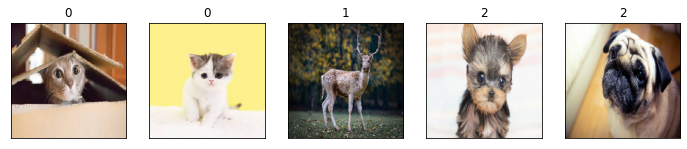

In [26]:
x_train, y_train = original_generator.next()

print(x_train.shape, y_train.shape)

plt.figure(figsize=(12,10))

for i in range(len(x_train)):

    plt.subplot(1, len(x_train), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str((int(y_train[i]))))
    
    plt.imshow(x_train[i])

# Augmentation 데이터 생성

In [27]:
augmentation_gen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=10, shear_range=0.1,
                                      horizontal_flip=True, zoom_range=0.1,
                                      width_shift_range=0.1, height_shift_range=0.1)

In [28]:
AUGMENTATION_COUNT = 4    # 원본 데이터의 4배 증대

In [29]:
augmentation_generator = augmentation_gen.flow_from_directory(DATA_ROOT_DIR,
                                   batch_size=total_data_nums, shuffle=False,
                                   target_size=(224, 224), class_mode='sparse')

print(augmentation_generator.class_indices)
print(augmentation_generator.num_classes)
print(augmentation_generator.class_mode)

Found 5 images belonging to 3 classes.
{'cat': 0, 'deer': 1, 'dog': 2}
3
sparse


[bofore]  (5, 224, 224, 3) (5,)
augmented shape =  (5, 224, 224, 3) (5,)
augmented shape =  (5, 224, 224, 3) (5,)
augmented shape =  (5, 224, 224, 3) (5,)
augmented shape =  (5, 224, 224, 3) (5,)
[after]  (25, 224, 224, 3) (25,)


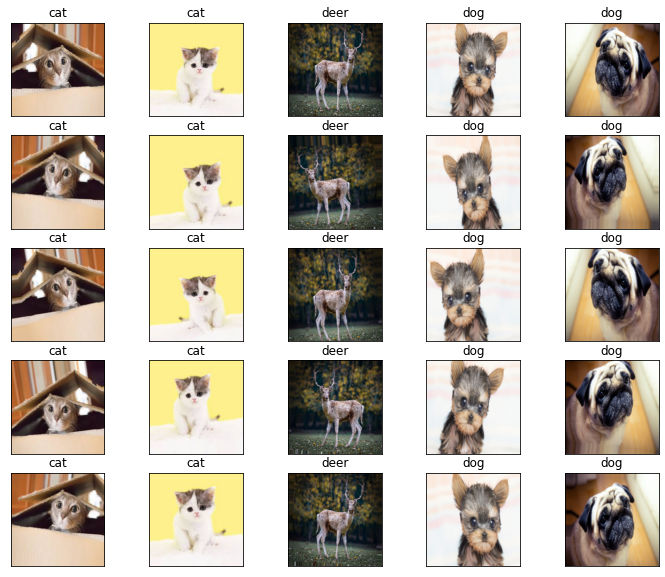

In [30]:
import numpy as np

class_names = { 0:'cat', 1:'deer', 2:'dog' }

print('[bofore] ', x_train.shape, y_train.shape)

for i in range(AUGMENTATION_COUNT):    # 5개의 전체 데이터에 대해서 총 4번 AUGMENTATION 실행

    x_augmented, y_augmented = augmentation_generator.next()

    print('augmented shape = ', x_augmented.shape, y_augmented.shape)

    x_train = np.concatenate( (x_train, x_augmented) )
    y_train = np.concatenate( (y_train, y_augmented) )

print('[after] ', x_train.shape, y_train.shape)

plt.figure(figsize=(12,10))

for i in range(25):

    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(class_names[int(y_train[i])]))
    
    plt.imshow(x_train[i])

# train data random shuffle

In [15]:
s = np.arange(x_train.shape[0])

np.random.shuffle(s)

x_train = x_train[s]

y_train = y_train[s]

In [16]:
print(x_train.shape, y_train.shape)

(25, 224, 224, 3) (25,)
